 # <font color='A6290E'> Employee Classification model</font>

## 1. Imports

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
# Sklearn classification imports
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import roc_curve
import imblearn.over_sampling
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

In [11]:
%matplotlib inline


In [ ]:
# pip install imblearn

## 2. Exploratory data analysis

In [12]:
#load dataset
Data= pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
# prof = ProfileReport(Data)

In [4]:
#undarstand data
# prof

In [ ]:
Data.head()

In [ ]:
Data.info()

In [ ]:
Data.describe()

In [ ]:
Data.nunique()

In [ ]:
Data['Over18'].unique()

In [ ]:
#clean the data
Data.isna().sum()

In [ ]:
Data['EducationField'].unique()

In [13]:
Data.Attrition = Data['Attrition'].map({'Yes': 1, 'No': 0})

In [14]:
##drop unwanted columns

Data = Data.drop(columns=['EmployeeNumber','EmployeeCount','Over18','StandardHours','TotalWorkingYears','MonthlyIncome','PerformanceRating','YearsAtCompany','StockOptionLevel','JobRole'])
Baseline_data = Data[['Age','Attrition', 'DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction','MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike',
       'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]


In [73]:
Baseline_data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,19479,8,11,1,0,1,4,0,5
1,49,0,279,8,1,3,61,2,2,2,24907,1,23,4,3,3,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2396,6,15,2,3,3,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,23159,1,11,3,3,3,7,3,0
4,27,0,591,2,1,1,40,3,1,2,16632,9,12,4,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,12290,4,17,3,3,3,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,21457,4,15,1,5,3,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,5174,1,20,2,0,3,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,13243,2,14,4,3,2,6,0,8


In [ ]:
#analyz the relationship 
corlation = Data.corr()


In [ ]:
sns.heatmap(corlation,xticklabels=corlation.columns,yticklabels=corlation.columns,annot=True)
plt.gcf().set_size_inches(20, 15)

In [ ]:
sns.pairplot(Data)

In [ ]:
# sns.relplot(X = 'JobSatisfaction',Y = 'JobRole',hue='Gender' ,data=Data)
# sns.distplot(Data['Gender'])

<AxesSubplot:>

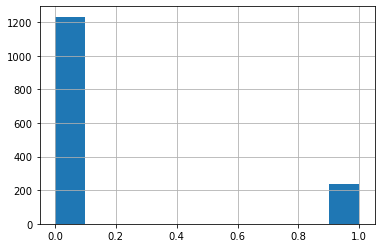

In [7]:
Data['Attrition'].hist()

In [16]:

Baseline_data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,19479,8,11,1,0,1,4,0,5
1,49,0,279,8,1,3,61,2,2,2,24907,1,23,4,3,3,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2396,6,15,2,3,3,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,23159,1,11,3,3,3,7,3,0
4,27,0,591,2,1,1,40,3,1,2,16632,9,12,4,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,12290,4,17,3,3,3,2,0,3
1466,39,0,613,6,1,4,42,2,3,1,21457,4,15,1,5,3,7,1,7
1467,27,0,155,4,3,2,87,4,2,2,5174,1,20,2,0,3,2,0,3
1468,49,0,1023,2,3,4,63,2,2,2,13243,2,14,4,3,2,6,0,8


In [17]:
Data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


## 3. Models

### A. Baseline model (KNN and Logistic Regression )

In [15]:
# #Split data to 60% Training set and 20% Valid set 20% Teset set
# def split_data(df_x, df_y): 
#     #Split to 80% Training set and 20% Teset set
#     X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size= 0.2, random_state=42)
#     #Split to 75% Training set and 25% Teset set
#     X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size= 0.25, random_state=42)
#     return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train_Base, X_test_Base, y_train_Base, y_test_Base = train_test_split(Baseline_data, Data['Attrition'], test_size=0.25, random_state=42)

In [16]:
# knn beasline model1
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_Base, y_train_Base)
print("Training score : {:.2f}".format(knn.score(X_train_Base, y_train_Base)))
y_pred_knn = knn.predict(X_test_Base)
print("Test score : {:.2f} ".format(accuracy_score(y_test_Base, y_pred_knn)))

Training score : 0.83
Test score : 0.86 


In [17]:

scores = cross_val_score(knn,Baseline_data, Data['Attrition'], cv=10, scoring='accuracy')
print(np.mean(scores))
print(classification_report(y_test_Base, y_pred_knn))

0.834013605442177
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       320
           1       0.00      0.00      0.00        48

    accuracy                           0.86       368
   macro avg       0.43      0.49      0.46       368
weighted avg       0.75      0.86      0.80       368



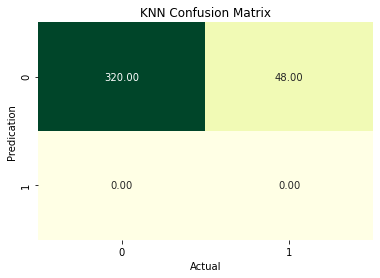

In [48]:
confusion_matrix= confusion_matrix(y_true = y_test_Base ,y_pred = y_pred_Base )

plt.clf()

# ax = figure.add_subplot(111)

# ax.set_aspect(1)

res = sns.heatmap(confusion_matrix.T, annot=True, fmt='.2f', cmap="YlGn", cbar=False)

# plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.title("KNN Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predication")
plt.show()

In [18]:
# Logistic Regression beasline model2
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_Base, y_train_Base)
print("Training score : {:.2f}".format(logreg.score(X_train_Base, y_train_Base)))
scores = cross_val_score(logreg,Baseline_data, Baseline_data['Attrition'], cv=10, scoring='accuracy')
print(np.mean(scores))

C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Training score : 0.83


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8489795918367345


C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abdul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [19]:
y_pred_Base = logreg.predict(X_test_Base)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_Base, y_test_Base)))

Accuracy of logistic regression classifier on test set: 0.87


In [20]:
# report 
print(classification_report(y_test_Base, y_pred_Base))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.00      0.00      0.00        48

    accuracy                           0.87       368
   macro avg       0.43      0.50      0.47       368
weighted avg       0.76      0.87      0.81       368



C:\Users\abdul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


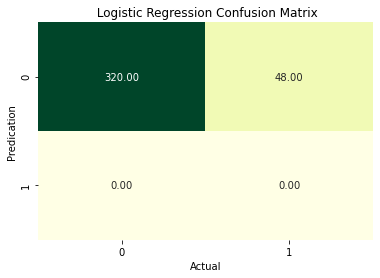

In [45]:
confusion_matrix= confusion_matrix(y_true = y_test_Base ,y_pred = y_pred_Base )

plt.clf()

# ax = figure.add_subplot(111)

# ax.set_aspect(1)

res = sns.heatmap(confusion_matrix.T, annot=True, fmt='.2f', cmap="YlGn", cbar=False)

# plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)
plt.title(" Logistic Regression Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predication")
plt.show()

### B. Class inbalancemnet

Text(0, 0.5, 'Value count')

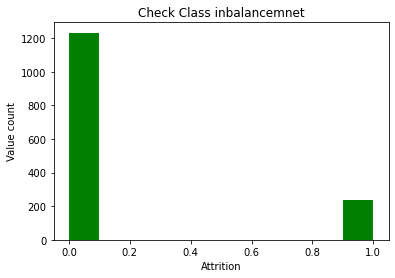

In [573]:
plt.hist(Data['Attrition'], color = "green")
plt.title("Check Class inbalancemnet")
plt.xlabel('Attrition')
plt.ylabel('Value count')
# Data['Attrition'].hist(color:"green")

In [25]:
Data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### C. Logistic Regression with Downsampling and dummy varibles

In [51]:
def downsample(Data_1):
    DownSample = imblearn.under_sampling.RandomUnderSampler()
    X, y = DownSample.fit_resample(Data_1.drop(['Attrition'], axis=1) , Data_1['Attrition'] ) 

    SampledData = pd.concat([X,y], axis=1)
    return SampledData

In [53]:
def BalanceLogreg(X_train, X_test, y_train, y_test):    
    logreg = LogisticRegression(max_iter= 5000)
    logreg.fit(X_train, y_train)
    print(logreg.score(X_train, y_train))
    scores = cross_val_score(logreg,Baseline_data, Data['Attrition'], cv=10, scoring='accuracy')
    print(np.mean(scores))
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    # report 
    print(classification_report(y_test, y_pred))

In [54]:
SampledData = downsample(Baseline_data)
# SampledData.Attrition.drop_duplicates().T

X_train1, X_test1, y_train1, y_test1 = train_test_split(SampledData.drop(columns='Attrition',axis=1), SampledData['Attrition'], test_size=0.25, random_state=42)
BalanceLogreg(X_train1, X_test1, y_train1, y_test1)

0.6422535211267606
1.0
Accuracy of logistic regression classifier on test set: 0.64
              precision    recall  f1-score   support

           0       0.64      0.61      0.63        59
           1       0.63      0.67      0.65        60

    accuracy                           0.64       119
   macro avg       0.64      0.64      0.64       119
weighted avg       0.64      0.64      0.64       119



In [55]:
Dummy_Data = pd.get_dummies(Data) 
# Dummy_Data
Sampled_Dummy_Data = downsample(Dummy_Data)

X_train2, X_test2, y_train2, y_test2 = train_test_split(Sampled_Dummy_Data.drop(columns='Attrition',axis=1), Sampled_Dummy_Data['Attrition'], test_size=0.25, random_state=42)
BalanceLogreg(X_train2, X_test2, y_train2, y_test2)

0.7774647887323943
1.0
Accuracy of logistic regression classifier on test set: 0.74
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        59
           1       0.75      0.73      0.74        60

    accuracy                           0.74       119
   macro avg       0.74      0.74      0.74       119
weighted avg       0.74      0.74      0.74       119



### D. Decision Tree Model

In [702]:

model_dt_a = DecisionTreeClassifier()
model_dt_a.fit(X_train2, y_train2)
print(model_dt_a.score(X_train2, y_train2))

predictions_dt_a = model_dt_a.predict(X_test2)
print("Testing :", accuracy_score(y_test2, predictions_dt_a))

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=35)
n_scores = cross_val_score(model_dt_a, Sampled_Dummy_Data.drop(columns='Attrition',axis=1), Sampled_Dummy_Data['Attrition'], scoring='accuracy')
# report performance
print('Accuracy : %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
print(classification_report(y_test2, predictions_dt_a))

1.0
Testing : 0.6722689075630253
Accuracy : 0.614 (0.033)
              precision    recall  f1-score   support

           0       0.66      0.71      0.68        59
           1       0.69      0.63      0.66        60

    accuracy                           0.67       119
   macro avg       0.67      0.67      0.67       119
weighted avg       0.67      0.67      0.67       119



In [755]:

# Build a decision tree model
model_dt = DecisionTreeClassifier()
# print(len(X_train1), len(y_train1))
path = model_dt.cost_complexity_pruning_path(X_train2, y_train2)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

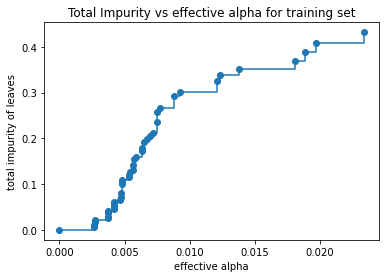

In [756]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [773]:
model_dt = DecisionTreeClassifier(ccp_alpha = 0.011, max_features = 'log2')
model_dt.fit(X_train2, y_train2)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=35)
n_scores = cross_val_score(model_dt, Sampled_Dummy_Data.drop(columns='Attrition',axis=1), Sampled_Dummy_Data['Attrition'], scoring='accuracy')
# report performance
print('Accuracy : %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


Accuracy : 0.606 (0.030)


In [774]:

print(model_dt.score(X_train2, y_train2))

0.752112676056338


In [775]:
# Check the model performance with the training data
predictions_dt = model_dt.predict(X_train2)
print("DecisionTreeClassifier", accuracy_score(y_train2, predictions_dt))

DecisionTreeClassifier 0.752112676056338


In [776]:
predictions_dt = model_dt.predict(X_test2)
print("Testing Score : ", accuracy_score(y_test2, predictions_dt))
print(classification_report(y_test2, predictions_dt))

Testing Score :  0.6638655462184874
              precision    recall  f1-score   support

           0       0.67      0.63      0.65        59
           1       0.66      0.70      0.68        60

    accuracy                           0.66       119
   macro avg       0.66      0.66      0.66       119
weighted avg       0.66      0.66      0.66       119



### E.  Random Forest Classifier Model

In [715]:

model_RFC = RandomForestClassifier(ccp_alpha=0.015)
# fit the model on the whole dataset
model_RFC.fit(X_train2, y_train2)
print(model_RFC.score(X_train2, y_train2))
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=35)
n_scores = cross_val_score(model_RFC, Sampled_Dummy_Data.drop(columns='Attrition',axis=1), Sampled_Dummy_Data['Attrition'], scoring='accuracy')
# report performance
print('Accuracy : %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
y_pred_RFC = model_RFC.predict(X_test2)
print(classification_report(y_test2, y_pred_RFC))
# train, test = train_test_split(n_df, test_size=0.2)
# train, val= train_test_split(train, test_size=0.25)
# cv=CountVectorizer()
# features=cv.fit_tranform(train)

0.8394366197183099
Accuracy : 0.745 (0.050)
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        59
           1       0.69      0.75      0.72        60

    accuracy                           0.71       119
   macro avg       0.71      0.71      0.71       119
weighted avg       0.71      0.71      0.71       119



In [716]:
predictions = model_RFC.predict(X_test2)
print("RandomForestClassifier", accuracy_score(y_test2, predictions))

RandomForestClassifier 0.7058823529411765


In [539]:
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
model_dt_rfe = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model_dt_rfe)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, SampledData.drop(columns='Attrition',axis=1), SampledData['Attrition'], scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.577 (0.071)


### F. xgboost

In [542]:
# xgboost
model_XGB = XGBClassifier()
model_XGB.fit(X_train2, y_train2)
print(model_XGB.score(X_train2, y_train2))

predictions_XGB = model_XGB.predict(X_test2)
print("Test : ", accuracy_score(y_test2, predictions_XGB))

C:\Users\abdul\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
Test :  0.6890756302521008


In [543]:
y_pred = model_XGB.predict(X_test2)
predictions = [value for value in y_pred]
accuracy = accuracy_score(y_test2, predictions)
print("Accuracy: %.2f" % (accuracy ))

Accuracy: 0.69


In [ ]:
# naive Bayes